Retrieving Arbitrary SpecialUnitary matrix

In [1]:
import pennylane as qml
import numpy as np
import jax
import cirq
from qiskit.quantum_info import *
from qiskit.synthesis import OneQubitEulerDecomposer

In [13]:
wires = [0, 1]

# Activating the Pauli words ["IY", "IZ", "XX", "XY", "YY", "YZ", "ZY", "ZZ"]

#theta = 0.3 * np.array([0, 1, 2, 0, -1, 1, 0, 0, 0, 1, 1, 1, 0, 0, -1])
theta = np.zeros(15)
len(theta) == 4 ** len(wires) - 1 # theta contains one parameter per Pauli word
su = qml.SpecialUnitary(theta, wires=wires)
matrix = su.matrix()

np.shape(matrix)

decomp = cirq.kak_decomposition(matrix)
#cirq.KakDecomposition(matrix)

decomp.interaction_coefficients
#decomp.single_qubit_operations_before[0]


(3.3209020967059675e-34, 0.0, 0.0)

In [4]:
wires = [0]

# Activating the Pauli words ["IY", "IZ", "XX", "XY", "YY", "YZ", "ZY", "ZZ"]

#theta = 0.3 * np.array([0, 1, 2, 0, -1, 1, 0, 0, 0, 1, 1, 1, 0, 0, -1])
theta = np.ones(3)
len(theta) == 4 ** len(wires) - 1 # theta contains one parameter per Pauli word
su = qml.SpecialUnitary(theta, wires=wires)
matrix = su.matrix()

# np.shape(matrix)

# decomp = cirq.kak_decomposition(matrix)
# #cirq.KakDecomposition(matrix)

# decomp.interaction_coefficients
#decomp.single_qubit_operations_before[0]
matrix

array([[-0.16055654+0.5698601j,  0.5698601 +0.5698601j],
       [-0.5698601 +0.5698601j, -0.16055654-0.5698601j]])

In [14]:
# Define the single-qubit operations before
B1 = decomp.single_qubit_operations_before[0]
B2 = decomp.single_qubit_operations_before[1]

# Define the interaction coefficients
k_x, k_y, k_z = decomp.interaction_coefficients


# Define the single-qubit operations after
A1 = decomp.single_qubit_operations_after[0]
A2 = decomp.single_qubit_operations_after[1]

In [15]:
decomposer = OneQubitEulerDecomposer('ZYZ')  # You can choose 'XYZ', 'ZXZ', 'ZYZ', etc.
decomposed_circuit = decomposer(Operator(A1))
#decomposed_circuit.angles()
decomposed_circuit.draw('mpl')

init_params_2 = np.zeros(15)

init_params_2[:3] = decomposer.angles(Operator(B1))
init_params_2[3:6] = decomposer.angles(Operator(B2))
init_params_2[6:9] = decomp.interaction_coefficients

init_params_2[9:12] = decomposer.angles(Operator(A1))
init_params_2[12:15] = decomposer.angles(Operator(A2))

init_params_2

array([ 0.00000000e+00,  7.85398163e-01,  7.85398163e-01,  0.00000000e+00,
       -7.85046229e-17,  7.85046229e-17,  3.32090210e-34,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.85398163e-01, -7.85398163e-01,
        0.00000000e+00,  7.85046229e-17, -7.85046229e-17])

In [48]:
def two_qubit_decomp(params, wires):
    """Implement an arbitrary SU(4) gate on two qubits
    using the decomposition from Theorem 5 in
    https://arxiv.org/pdf/quant-ph/0308006.pdf"""
    i, j = wires
    # Single U(2) parameterization on both qubits separately
    qml.Rot(*params[:3], wires=i)
    qml.Rot(*params[3:6], wires=j)
    qml.CNOT(wires=[j, i])  # First CNOT
    qml.RZ(params[6], wires=i)
    qml.RY(params[7], wires=j)
    qml.CNOT(wires=[i, j])  # Second CNOT
    qml.RY(params[8], wires=j)
    qml.CNOT(wires=[j, i])  # Third CNOT
    # Single U(2) parameterization on both qubits separately
    qml.Rot(*params[9:12], wires=i)
    qml.Rot(*params[12:15], wires=j)
su_1 = two_qubit_decomp(theta,wires=[0,1])
type(su_1)


NoneType

KAK Decomposition

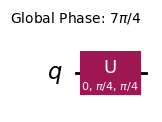

In [90]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Define a 4x4 unitary matrix
U = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
], dtype=complex)

# Ensure it is unitary
assert np.allclose(np.eye(2), A1 @ A1.conj().T)

# Create a unitary gate from the matrix
gate = UnitaryGate(A1)

# Create a quantum circuit with the unitary gate
qc = QuantumCircuit(1)
qc.append(gate, [0])

# Decompose the gate to retrieve the parameters
decomposed_circuit = qc.decompose(reps=10)
decomposed_circuit.decompose
decomposed_circuit.draw('mpl')
# Alternatively, if you need specific parameters (angles, phases, etc.),
# you may need to implement or use specialized decomposition methods.

In [12]:
decomposer = OneQubitEulerDecomposer('ZYZ')  # You can choose 'XYZ', 'ZXZ', 'ZYZ', etc.
decomposed_circuit = decomposer(Operator(B1))
#decomposed_circuit.angles()
decomposed_circuit.draw('mpl')

# init_params_2 = np.zeros(15)

decomposer.angles(Operator(B2))
# init_params_2[3:6] = decomposer.angles(Operator(B1))
# init_params_2[:3] = decomposer.angles(Operator(A1))
# init_params_2[:3] = decomposer.angles(Operator(A1))

(0.0, -7.850462293418878e-17, 7.850462293418876e-17)